In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# 1 Loading and Preprocessing

In [47]:
# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [16]:
df=df.drop_duplicates()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


In [22]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
# scale the data
data = load_iris()
x=data.data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

# 2. Clustering Algorithem implementation

C:\Users\ashia\AppData\Local\Temp\ipykernel_29056\495855132.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


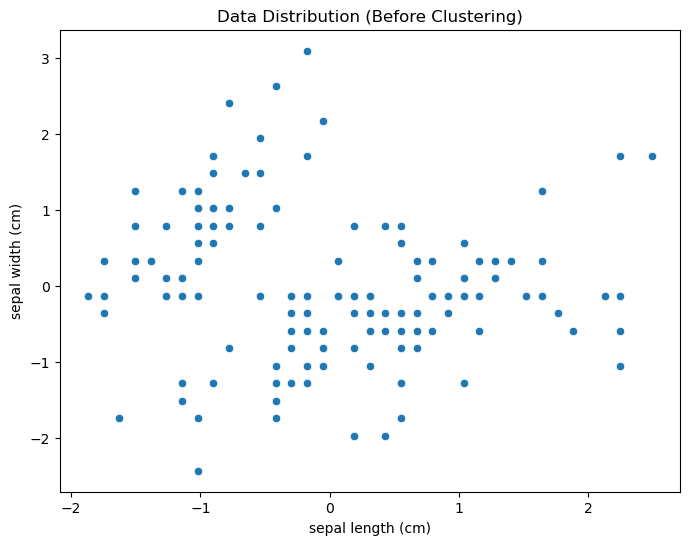

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_data[:, 0],
    y=scaled_data[:, 1],
    palette="viridis"
)
plt.title("Data Distribution (Before Clustering)")

plt.xlabel(data.feature_names[0])  # Feature 1 name
plt.ylabel(data.feature_names[1])  # Feature 2 name
plt.show()
# Visualising data before clustering

In [33]:
wcss = []
k_values = range(1, 11)  # Try cluster numbers from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to the nearest cluster center

C:\Users\ashia\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ashia\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ashia\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ashia\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

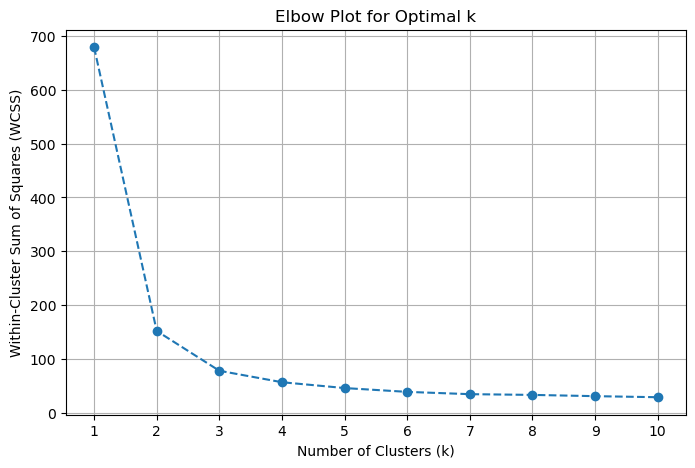

In [35]:
# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Plot for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid()

The "elbow point" is at k=3, which suggests that dividing the data into 3 clusters is optimal for this dataset.

# A)KMeans Clustering

#### KMeans Clustering: Overview
                     KMeans is an unsupervised machine learning algorithm used for clustering data into distinct groups 
                     based on their features.The objective is to partition the dataset into K clusters, where each data point 
                     belongs to the cluster with the nearest mean

#### Why KMeans is Suitable for the Iris Dataset?:
                      Iris has numerical features, making it compatible with the Euclidean distance used in KMeans.
                      The dataset is small and well-separated, ideal for KMeans, which works best with distinct clusters.

In [58]:
#Preprocess the data (scaling to normalize feature values)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert back to a DataFrame for easier visualization
scaled_data_df = pd.DataFrame(scaled_data, columns=data.feature_names)

#Apply KMeans clustering
km = KMeans(n_clusters=3, random_state=42)
y_pred = km.fit_predict(scaled_data) #y_pred= cluster labels
y_pred

C:\Users\ashia\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
# Add cluster labels to the dataset for visualization
scaled_data_df['Km_Cluster'] = y_pred
scaled_data_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Km_Cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,2
2,-1.385353,0.328414,-1.397064,-1.315444,2
3,-1.506521,0.098217,-1.283389,-1.315444,2
4,-1.021849,1.249201,-1.340227,-1.315444,1
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,0
146,0.553333,-1.282963,0.705921,0.922303,0
147,0.795669,-0.131979,0.819596,1.053935,0
148,0.432165,0.788808,0.933271,1.448832,0


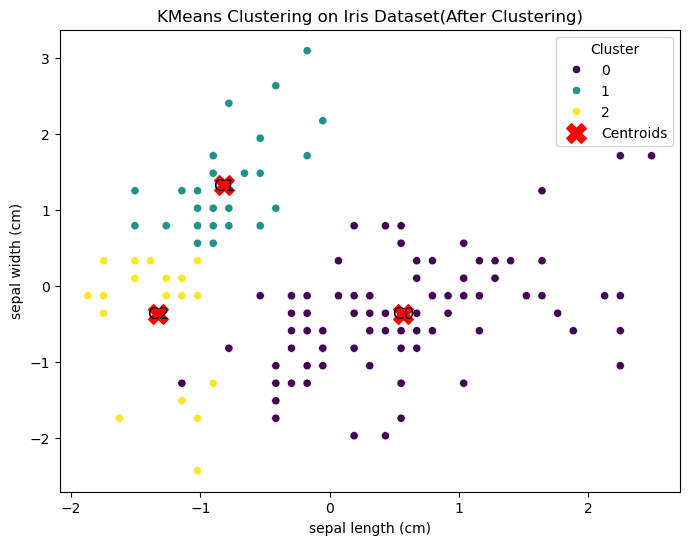

In [64]:
centroids=km.cluster_centers_
# Visualization of the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data_df.iloc[:, 0], y=scaled_data_df.iloc[:, 1], hue=y_pred, palette="viridis")

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

# Annotate centroids
for i, (x, y) in enumerate(centroids[:, :2]):  # Iterate through centroid coordinates
    plt.text(x, y, f'C{i}', color='black', fontsize=12, ha='center', va='center')
    
plt.title("KMeans Clustering on Iris Dataset(After Clustering)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title="Cluster")
plt.show()

# B) Hierarchical Clustering

#### Hierarchical Clustering:
                   Hierarchical clustering is an unsupervised machine learning algorithm that builds a hierarchy of clusters
                   by either agglomerating (bottom-up) or dividing (top-down) the data into smaller clusters. 
                   The goal is to build a tree-like structure called a dendrogram, which represents the data 
                   points and their respective clusters.e.g., Euclidean, Manhattan

#### why Hierarchical clustering might be suitable for the Iris dataset
                  Provides insights into the hierarchical relationships between samples.
                  Suitable for small datasets like Iris due to computational efficiency.

In [83]:
# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_data)

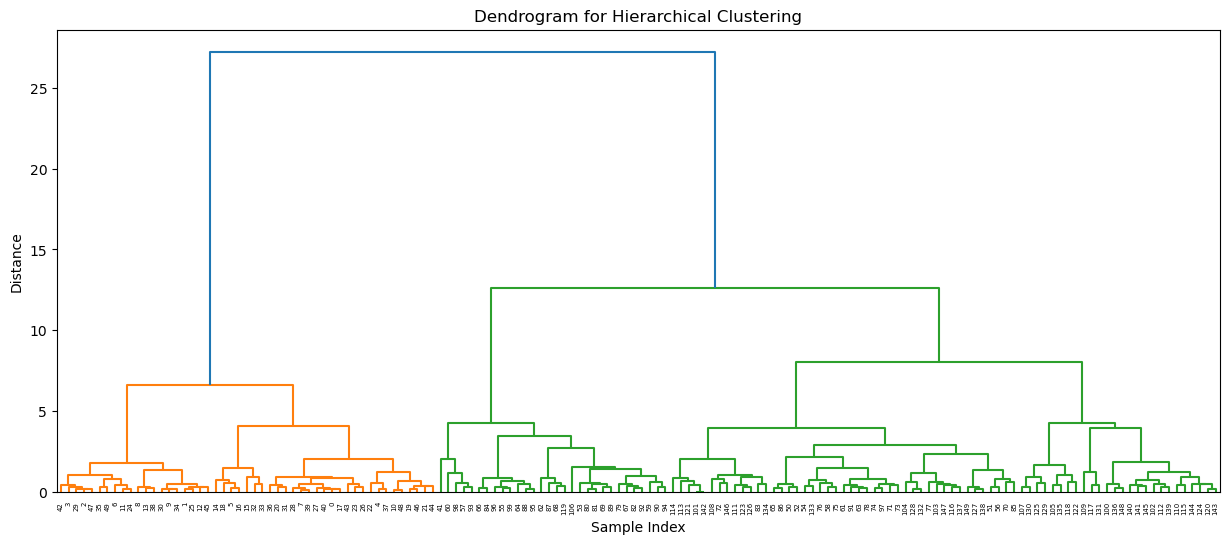

In [85]:
# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(15, 6))
linkage_matrix = linkage(scaled_data, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()